In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'C:\\Users\\SUDHARSHAN'

In [4]:
os.chdir('F:\TopMentor_DataScience\Batch 103 Day 32')
os.getcwd()

'F:\\TopMentor_DataScience\\Batch 103 Day 32'

In [5]:
df1=pd.read_csv('50_Startups.csv')
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,California,166187.94


In [37]:
x=df1.iloc[:,:-1].values
x.shape

(50, 4)

In [25]:
y=df1.iloc[:,4].values
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [38]:
x[:,3]

array(['New York', 'California', 'Florida', 'New York', 'California',
       'New York', 'California', 'New York', 'New York', 'California',
       'California', 'Florida', 'California', 'California', 'Florida',
       'New York', 'California', 'New York', 'New York', 'Florida',
       'California', 'New York', 'California', 'California', 'New York',
       'California', 'New York', 'New York', 'Florida', 'New York',
       'New York', 'New York', 'California', 'New York', 'Florida',
       'New York', 'New York', 'California', 'New York', 'California',
       'Florida', 'California', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California'],
      dtype=object)

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,3]=le.fit_transform(x[:,3])

In [40]:
x.shape

(50, 4)

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#ct=ColumnTransformer()

In [42]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
#x = np.array(ct.fit_transform(x))
print (x)


[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 0.0 1.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [1.0 0.0 0.0 101913.08 110594.11 229160.95]
 [0.0 1.0 0.0 100671.96 91790.61 249744.55]
 [1.0 0.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 0.0 1.0 91749.16 114175.79 294919.57]
 [0.0 1.0 0.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [1.0 0.0 0.0 73994.56 122782.75 3

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
x_train.shape

(40, 6)

In [46]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr

LinearRegression()

In [47]:
lr.fit(x_train, y_train)

LinearRegression()

In [48]:
y_pred=lr.predict(x_test)

In [64]:
y_pred

array([113091.57440493,  57264.33902357, 109427.27842113, 129223.21535843,
       136383.00528286, 112721.03643243, 174546.16908213,  72402.06511701,
        91237.08483218, 154454.25288943])

In [63]:
y_pred_df=pd.DataFrame(y_pred,columns=['Predictions'])
y_test_df=pd.DataFrame(y_test,columns=['y_test'])

In [51]:
result=pd.concat([y_pred_df,y_test_df], axis=1)

In [52]:
result['difference']=y_test-y_pred

In [53]:
result

,Predictions,y_test,difference
0,113091.574405,108552.04,-4539.534405
1,57264.339024,69758.98,12494.640976
2,109427.278421,108733.99,-693.288421
3,129223.215358,125370.37,-3852.845358
4,136383.005283,146121.95,9738.944717
5,112721.036432,105008.31,-7712.726432
6,174546.169082,166187.94,-8358.229082
7,72402.065117,90708.19,18306.124883
8,91237.084832,96712.80,5475.715168
9,154454.252889,132602.65,-21851.602889


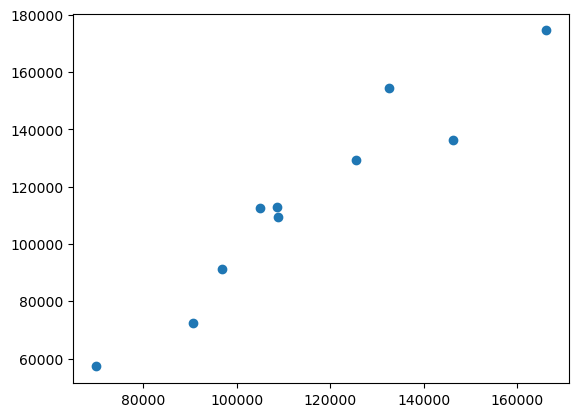

In [54]:
plt.scatter(y_test, y_pred)
plt.show()

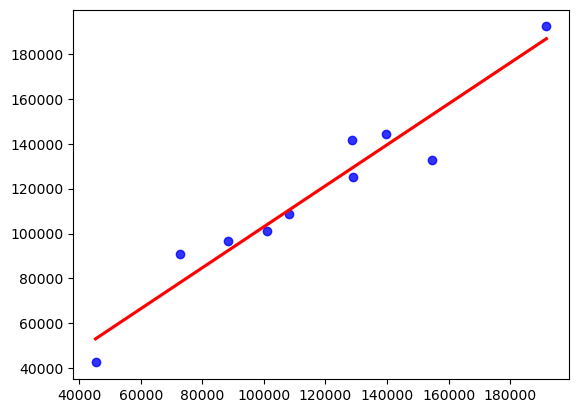

In [83]:
import seaborn as sns
sns.regplot( x = y_pred, y= y_test,scatter_kws={"color": "b"}, 
            line_kws={"color": "r"},ci = None)
plt.show()

In [55]:
x_test_df=pd.DataFrame(x_test,columns=['Cf','Ny','Fl','RDSpend','Admin Spend','MarketingSpend'])
x_test_df

,Cf,Ny,Fl,RDSpend,Admin Spend,MarketingSpend
0,0.0,0.0,1.0,77044.01,99281.34,140574.81
1,0.0,0.0,1.0,15505.73,127382.3,35534.17
2,1.0,0.0,0.0,67532.53,105751.03,304768.73
3,0.0,0.0,1.0,94657.16,145077.58,282574.31
4,1.0,0.0,0.0,101913.08,110594.11,229160.95
5,0.0,0.0,1.0,72107.6,127864.55,353183.81
6,1.0,0.0,0.0,142107.34,91391.77,366168.42
7,0.0,0.0,1.0,28663.76,127056.21,201126.82
8,0.0,1.0,0.0,46426.07,157693.92,210797.67
9,0.0,1.0,0.0,119943.24,156547.42,256512.92


In [59]:
result=pd.concat([x_test_df,y_pred_df,y_test_df], axis=1)
result['difference']=y_test-y_pred
result

,Cf,Ny,Fl,RDSpend,Admin Spend,MarketingSpend,Predictions,y_test,difference
0,0.0,0.0,1.0,77044.01,99281.34,140574.81,113091.574405,108552.04,-4539.534405
1,0.0,0.0,1.0,15505.73,127382.3,35534.17,57264.339024,69758.98,12494.640976
2,1.0,0.0,0.0,67532.53,105751.03,304768.73,109427.278421,108733.99,-693.288421
3,0.0,0.0,1.0,94657.16,145077.58,282574.31,129223.215358,125370.37,-3852.845358
4,1.0,0.0,0.0,101913.08,110594.11,229160.95,136383.005283,146121.95,9738.944717
5,0.0,0.0,1.0,72107.6,127864.55,353183.81,112721.036432,105008.31,-7712.726432
6,1.0,0.0,0.0,142107.34,91391.77,366168.42,174546.169082,166187.94,-8358.229082
7,0.0,0.0,1.0,28663.76,127056.21,201126.82,72402.065117,90708.19,18306.124883
8,0.0,1.0,0.0,46426.07,157693.92,210797.67,91237.084832,96712.80,5475.715168
9,0.0,1.0,0.0,119943.24,156547.42,256512.92,154454.252889,132602.65,-21851.602889


In [60]:
from sklearn.metrics import r2_score

In [61]:
accuracy=r2_score(y_test,y_pred)
accuracy

0.8241390558968298

In [65]:
y_test

array([108552.04,  69758.98, 108733.99, 125370.37, 146121.95, 105008.31,
       166187.94,  90708.19,  96712.8 , 132602.65])

In [66]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [67]:
y_total=lr.predict(x)

In [110]:
y_total

array([191781.56453563, 189219.17692084, 186594.33209964, 172955.06556398,
       171929.62460593, 162552.17404367, 159780.65411829, 159465.94821179,
       151020.99812465, 154697.06762708, 135306.70402687, 139698.81532612,
       128632.49237183, 126947.69663652, 154475.81355618, 145599.48282233,
       115826.21982743, 128948.15810825, 127445.15871616, 121561.39850342,
       115202.13526702, 115529.05799032, 113213.43560741, 108228.33408342,
       112485.63002326, 101823.53842866, 109940.96707297, 111908.78197295,
       106253.42304157, 101110.18276604,  98607.92938839,  97020.12468836,
        99202.54434844,  95885.61124285,  92254.50910535,  88198.50574732,
        72721.43997286,  87750.82437817,  66722.09363656,  82026.15381644,
        77635.63338324,  72888.57460273,  68767.83143187,  58496.62866258,
        63912.53157316,  45813.4424991 ,  57253.79386692,  45291.15142104,
        46986.83534001,  46582.39678308])

In [68]:
r2_score(y,y_total)

0.9493442046967533

In [69]:
y_fpred= pd.DataFrame(y_total, columns =['Prediction'])
result = pd.concat([df1,y_fpred], axis =1)
result['Difference'] = result['Profit'] - result ['Prediction']
display (result)


,R&D Spend,Administration,Marketing Spend,State,Profit,Prediction,Difference
0,165349.20,136897.80,471784.10,New York,192261.83,193870.332145,-1608.502145
1,162597.70,151377.59,443898.53,California,191792.06,190872.665697,919.394303
2,153441.51,101145.55,407934.54,Florida,191050.39,189037.338205,2013.051795
3,144372.41,118671.85,383199.62,New York,182901.99,174883.201472,8018.788528
4,142107.34,91391.77,366168.42,California,166187.94,174546.169082,-8358.229082
5,131876.90,99814.71,362861.36,New York,156991.12,164739.999500,-7748.879500
6,134615.46,147198.87,127716.82,California,156122.51,159784.532471,-3662.022471
7,130298.13,145530.06,323876.68,New York,155752.60,160286.958902,-4534.358902
8,120542.52,148718.95,311613.29,New York,152211.77,151603.375275,608.394725
9,123334.88,108679.17,304981.62,California,149759.96,156394.464012,-6634.504012


In [76]:
print(type(x))
x2=x.astype("float64")
type(x2)

<class 'numpy.ndarray'>


numpy.ndarray

In [91]:
import statsmodels.api as sm
reg_ols=sm.OLS(endog=y,exog=x)
reg_ols=reg_ols.fit()
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     171.2
Date:                Sat, 02 Nov 2024   Prob (F-statistic):           1.14e-27
Time:                        18:01:48   Log-Likelihood:                -525.19
No. Observations:                  50   AIC:                             1062.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5.062e+04   6806.869      7.436      0.000    3.69e+04    6.43e+04
x2          5.277e+04   8130.622      6.491      0.000    3.64e+04    6.92e+04
x3           5.06e+04   7041.319      7.186      0.000    3.64e+04    6.48e+04
x4             0.8078      0.046     17.507      0.000       0.715       0.901
x5            -0.0337      0.054     -0.630      0.532      -0.142       0.074
x6             0.0265      0.017      1.578      0.122      -0.007       0.060
==============================================================================
Omnibus:                       15.116   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.291
Skew:                          -0.956   Prob(JB):                     1.44e-05
Kurtosis:                       5.654   Cond. No.                     2.56e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
import statsmodels.api as sm
reg_ols = sm.OLS (endog = y, exog = x)
reg_ols = reg_ols.fit()
print (reg_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     171.2
Date:                Sat, 02 Nov 2024   Prob (F-statistic):           1.14e-27
Time:                        18:00:36   Log-Likelihood:                -525.19
No. Observations:                  50   AIC:                             1062.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5.062e+04   6806.869      7.436      0.0

In [96]:
df2_predict=pd.read_csv('50_Startups_Predictions.csv')

In [97]:
df2_predict

,R&D Spend,Administration,Marketing Spend,State
0,120542.52,148718.95,311613.29,New York
1,123334.88,108679.17,304981.62,California
2,101913.08,110594.11,229160.95,California
3,100671.96,91790.61,249744.55,Florida
4,93863.75,127320.38,249839.44,California
5,91992.39,135495.07,252664.93,California
6,119943.24,156547.42,256512.92,Florida
7,114523.61,122616.84,261776.23,New York
8,78013.11,121597.55,264346.06,California
9,72107.60,127864.55,353183.81,New York


In [100]:
x_predict=df2_predict.iloc[:,:1]

In [101]:
x_predict

,R&D Spend
0,120542.52
1,123334.88
2,101913.08
3,100671.96
4,93863.75
5,91992.39
6,119943.24
7,114523.61
8,78013.11
9,72107.60


In [103]:
y_prediction=lr.predict(x)

In [104]:
y_prediction

array([193870.33214471, 190872.66569712, 189037.33820529, 174883.20147208,
       174546.16908213, 164739.99949972, 159784.53247082, 160286.95890209,
       151603.37527546, 156394.46401203, 136383.00528286, 141104.66306125,
       129294.4655152 , 127394.4917954 , 154454.25288943, 146556.213387  ,
       116539.42813845, 129223.21535843, 128538.25721089, 120081.40708744,
       116254.5436382 , 115494.57698595, 114036.23952127, 109427.27842113,
       113091.57440493, 101353.13126338, 109351.57686642, 112721.03643243,
       104368.41569456, 100068.41533438,  98411.21508723,  95853.02922224,
        98556.58586627,  96518.12118632,  91237.08483218,  89152.11820656,
        72402.06511701,  89601.71396473,  67805.68910592,  82907.24015907,
        77261.76486068,  73567.10973696,  69032.57090562,  57264.33902357,
        62106.64226327,  44358.67610004,  57246.10109079,  43621.83142986,
        47370.82401303,  45594.81362228])

In [107]:
result3=pd.DataFrame(y_prediction, columns=["Test_predict"])
df

In [111]:
df2_predict=pd.concat([df2_predict,result3],axis=1)

In [112]:
df2_predict

,R&D Spend,Administration,Marketing Spend,State,Test_predict
0,120542.52,148718.95,311613.29,New York,193870.332145
1,123334.88,108679.17,304981.62,California,190872.665697
2,101913.08,110594.11,229160.95,California,189037.338205
3,100671.96,91790.61,249744.55,Florida,174883.201472
4,93863.75,127320.38,249839.44,California,174546.169082
5,91992.39,135495.07,252664.93,California,164739.999500
6,119943.24,156547.42,256512.92,Florida,159784.532471
7,114523.61,122616.84,261776.23,New York,160286.958902
8,78013.11,121597.55,264346.06,California,151603.375275
9,72107.60,127864.55,353183.81,New York,156394.464012
